# Add a 3rd Y axis to Python Combo chart

This is a Notebook for the medium article [Adding a Third Y-axis to Python Combo Chart
](https://bindichen.medium.com/adding-a-third-y-axis-to-python-combo-chart-39f60fb66708)

Please check out article for instructions

**License**: [BSD 2-Clause](https://opensource.org/licenses/BSD-2-Clause)


#### Version of packages used in this Notebook

In [1]:
import matplotlib as m
import numpy as np
import pandas as pd
import seaborn as sns

# Make sure your package version >= them
print('matplotlib: ', m.__version__)
print('numpy: ', np.__version__)
print('pandas: ', pd.__version__)
print('seaborn: ', sns.__version__)

matplotlib:  3.5.1
numpy:  1.18.1
pandas:  1.1.4
seaborn:  0.10.1


# Tutorial

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
plt.style.use('seaborn')
# Needed for jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Default figure size: 8 by 5
plt.rcParams['figure.figsize'] = (8, 5)

In [4]:
x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
average_temp = [5.2, 5.3,7.6,9.9,13.3,16.5,18.7, 18.5, 15.7, 12.0, 8.0, 5.5]
average_percipitation_mm = [55.2, 40.9, 41.6, 43.7, 49.4, 45.1, 44.5, 49.5, 49.1, 68.5, 59.0, 55.2]
average_uv_index = [1,1,2,4,5,6,6,5,4,2,1,0]

london_climate = pd.DataFrame(
  {
    'average_temp': average_temp,
    'average_percipitation_mm': average_percipitation_mm,
    'average_uv_index': average_uv_index
  }, 
  index=x
)

london_climate

,average_temp,average_percipitation_mm,average_uv_index
Jan,5.2,55.2,1
Feb,5.3,40.9,1
Mar,7.6,41.6,2
Apr,9.9,43.7,4
May,13.3,49.4,5
Jun,16.5,45.1,6
Jul,18.7,44.5,6
Aug,18.5,49.5,5
Sep,15.7,49.1,4
Oct,12.0,68.5,2


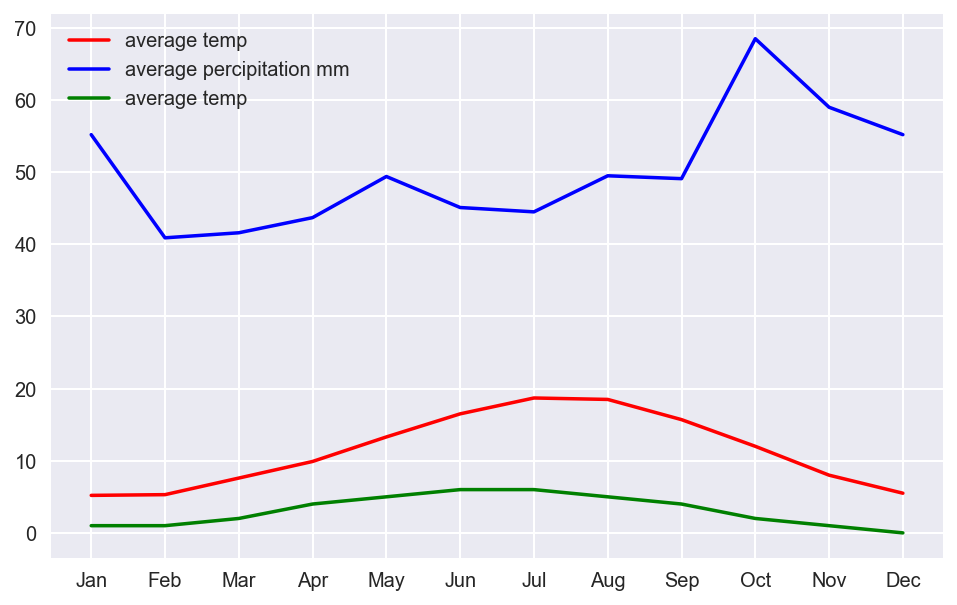

In [5]:
plt.plot(x, average_temp, "-r", label="average temp")
plt.plot(x, average_percipitation_mm, "-b", label="average percipitation mm", )
plt.plot(x, average_uv_index, "-g", label="average temp")
plt.legend(loc="upper left")
plt.show()

<AxesSubplot:>

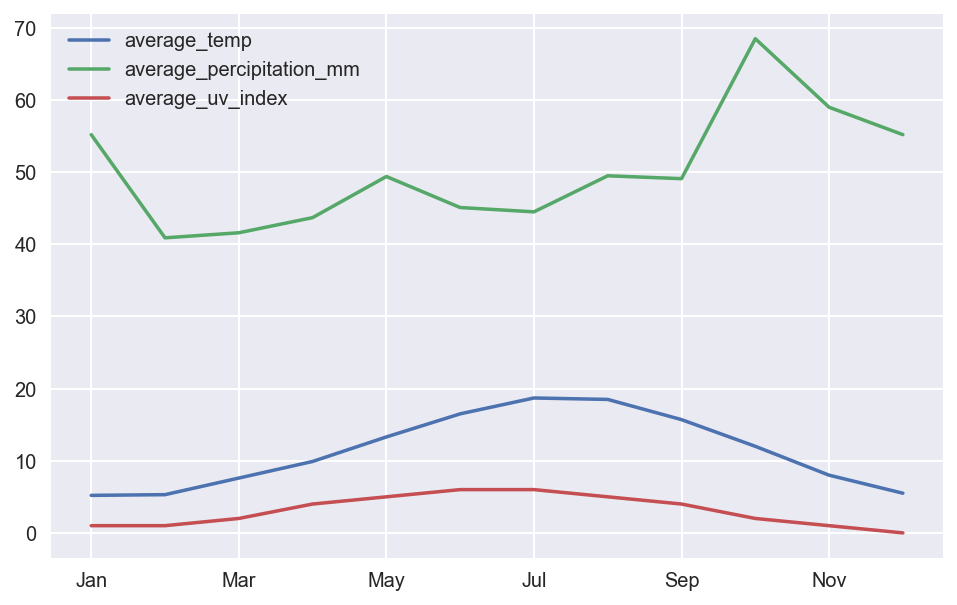

In [6]:
london_climate.plot()

## 1. Matplotlib - add the 3rd Y-axis

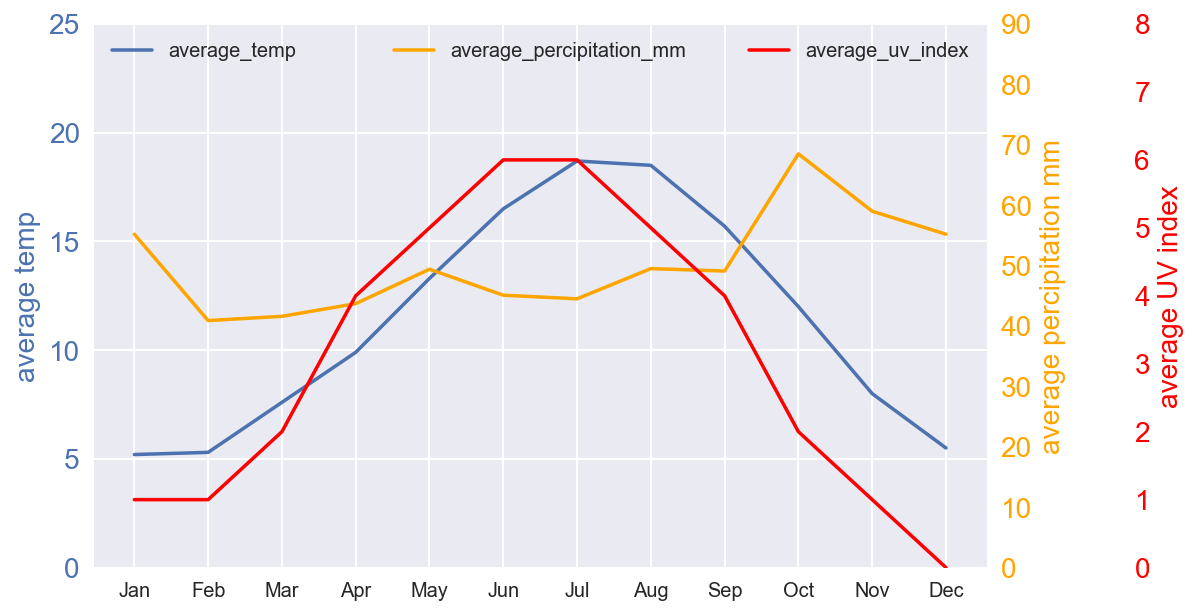

In [7]:
# Create figure and axis #1
fig, ax1 = plt.subplots()

# plot line chart on axis #1
p1, = ax1.plot(x, average_temp) 
ax1.set_ylabel('average temp')
ax1.set_ylim(0, 25)
ax1.legend(['average_temp'], loc="upper left")
ax1.yaxis.label.set_color(p1.get_color())
ax1.yaxis.label.set_fontsize(14)
ax1.tick_params(axis='y', colors=p1.get_color(), labelsize=14)

# set up the 2nd axis
ax2 = ax1.twinx() 
# plot bar chart on axis #2
p2, = ax2.plot(x, average_percipitation_mm, color='orange')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('average percipitation mm')
ax2.set_ylim(0, 90)
ax2.legend(['average_percipitation_mm'], loc="upper center")
ax2.yaxis.label.set_color(p2.get_color())
ax2.yaxis.label.set_fontsize(14)
ax2.tick_params(axis='y', colors=p2.get_color(), labelsize=14)

# set up the 3rd axis
ax3 = ax1.twinx()
# Offset the right spine of ax3.  The ticks and label have already been
# placed on the right by twinx above.
ax3.spines.right.set_position(("axes", 1.15))
# Plot line chart on axis #3
p3, = ax3.plot(x, average_uv_index, color='red')
ax3.grid(False) # turn off grid #3
ax3.set_ylabel('average UV index')
ax3.set_ylim(0, 8)
ax3.legend(['average_uv_index'], loc="upper right")
ax3.yaxis.label.set_color(p3.get_color())
ax3.yaxis.label.set_fontsize(14)
ax3.tick_params(axis='y', colors=p3.get_color(), labelsize=14)

plt.show()

## 2. Seaborn - add the 3rd Y-axis

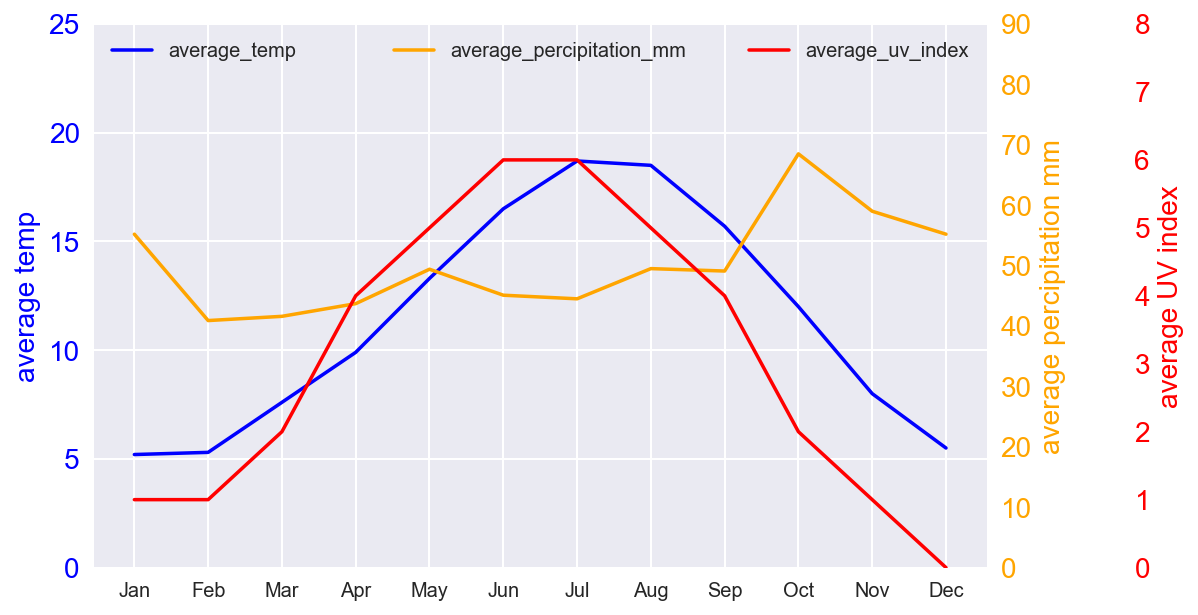

In [8]:
# plot line chart on axis #1
ax1 = sns.lineplot(
    x=london_climate.index, 
    y='average_temp', 
    data=london_climate, 
    sort=False, 
    color='blue'
)
ax1.set_ylabel('average temp')
ax1.set_ylim(0, 25)
ax1.legend(['average_temp'], loc="upper left")
ax1.yaxis.label.set_color('blue')
ax1.yaxis.label.set_fontsize(14)
ax1.tick_params(axis='y', colors='blue', labelsize=14)

# set up the 2nd axis
ax2 = ax1.twinx() 

# plot bar chart on axis #2
sns.lineplot(
    x=london_climate.index, 
    y='average_percipitation_mm', 
    data=london_climate, 
    sort=False, 
    color='orange', 
    ax = ax2       # Pre-existing axes for the plot
)
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('average percipitation mm')
ax2.set_ylim(0, 90)
ax2.legend(['average_percipitation_mm'], loc="upper center")
ax2.yaxis.label.set_color('orange')
ax2.yaxis.label.set_fontsize(14)
ax2.tick_params(axis='y', colors='orange', labelsize=14)

# set up the 3rd axis
ax3 = ax1.twinx()
# Offset the right spine of ax3.  The ticks and label have already been
# placed on the right by twinx above.
ax3.spines.right.set_position(("axes", 1.15))
# Plot line chart on axis #3
p3 = sns.lineplot(
    x=london_climate.index, 
    y='average_uv_index', 
    data=london_climate, 
    sort=False, 
    color='red', 
    ax = ax3       # Pre-existing axes for the plot
)
ax3.grid(False) # turn off grid #3
ax3.set_ylabel('average UV index')
ax3.set_ylim(0, 8)
ax3.legend(['average_uv_index'], loc="upper right")
ax3.yaxis.label.set_color('red')
ax3.yaxis.label.set_fontsize(14)
ax3.tick_params(axis='y', colors='red', labelsize=14)

plt.show()

## 3. Pandas `plot()`  - add the 3rd Y-axis

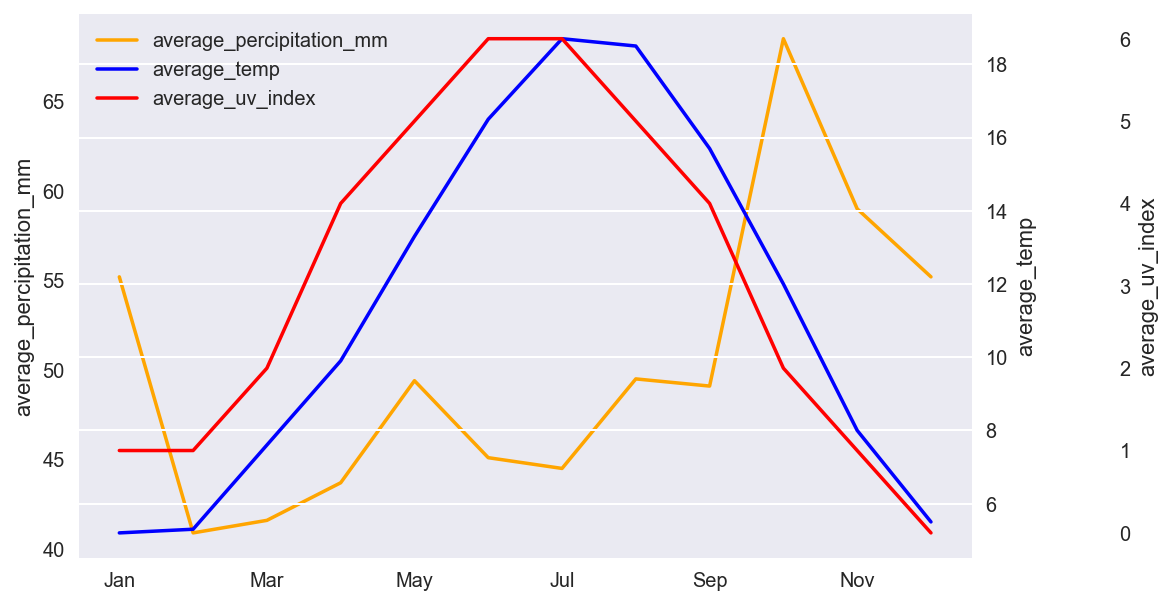

In [9]:
# Create the figure and axes object
fig, ax = plt.subplots()

# Plot the first x and y axes:
london_climate.plot(
    use_index=True, 
    y='average_percipitation_mm', 
    ax=ax, 
    color='orange'
)
ax.set_ylabel('average_percipitation_mm')

# Plot the second x and y axes. 
# By secondary_y = True a second y-axis is requested
ax2 = london_climate.plot(
    use_index=True, 
    y='average_temp', 
    ax=ax, 
    secondary_y=True, 
    color='blue'
)
ax.legend().set_visible(False)
ax2.set_ylabel('average_temp')

# Plot the third x and y axes
ax3 = ax.twinx()
ax3.spines.right.set_position(("axes", 1.15))
london_climate.plot(
    use_index=True, 
    y='average_uv_index', 
    ax=ax3, 
    color='red'
)
ax3.grid(False)
ax3.set_ylabel('average_uv_index')

# Set up legends
ax3.legend(
    [ax.get_lines()[0], ax2.get_lines()[0], ax3.get_lines()[0]], 
    ['average_percipitation_mm','average_temp','average_uv_index'], 
    loc="upper left"
)

plt.show()

## Thanks for reading

This is a Notebook for the medium article [Adding a Third Y-axis to Python Combo Chart
](https://bindichen.medium.com/adding-a-third-y-axis-to-python-combo-chart-39f60fb66708)

Please check out article for instructions

**License**: [BSD 2-Clause](https://opensource.org/licenses/BSD-2-Clause)